# 7. Population charts

Population charts are a new addition to Multiplex that help you display data visually with one point per population item.
These kind of visualizations can be helpful in many scenarios, such as displaying the population of countries to breaking down a population into different groups.

As usual, Multiplex gives you the possibility of customizing these visualizations to your heart's content, allowing you tell different stories with the same type of visualization.
We'll explore these options in this notebook.
We will go through some examples that show you how you can use population charts in your projects.

In [1]:
%load_ext autoreload
%autoreload 2

import importlib
import matplotlib.pyplot as plt
import os
import pandas as pd
import sys

path = sys.path[0]
path = os.path.join(path, "..")
if path not in sys.path:
    sys.path.insert(1, path)

The population chart example we will follow in this notebook is the medal table from the 2016 Olympic Games in Rio de Janeiro.
The simplest use case for the population chart is as an alternative to a bar chart to show how different countries fared.

As usual, the first step is reading in the data.
The file is made up of 4 fields: the country, and the numbers of gold, silver and bronze models they won.
To these fields we add the total number of medals.

In [2]:
# load the data
df = pd.read_csv('data/2016-olympics-medals.csv')
df = df.set_index('Country')
df['Total'] = df.Gold + df.Silver + df.Bronze
df = df.sort_values(by='Total', ascending=False)
df

Gold  Silver  Bronze  Total
Country                                        
United States         46      37      38    121
China                 26      18      26     70
Great Britain         27      23      17     67
Russian Federation    19      18      19     56
Germany               17      10      15     42
...                  ...     ...     ...    ...
Qatar                  0       1       0      1
Niger                  0       1       0      1
Burundi                0       1       0      1
Grenada                0       1       0      1
Kyrgyzstan             0       0       0      0

[88 rows x 4 columns]

As usual, we follow a few simple steps to draw the data:

1. We import the Drawable class and the style,
2. We define a general style for all population items, and
3. We draw the population.

In [3]:
# import the Drawable class and set the style
from multiplex import drawable
plt.style.use(os.path.join(sys.path[0], '..', 'styles', "modern.style"))

# create a general style
style = { 's': 150, 'color': '#E2E2E2', 'edgecolors': '#BDBDBD', 'linewidths': 0.5 }

When we draw a population chart, the function automatically styles the plot for us, making these changes:

1. It removes the y-axes from the left,
2. It inverts the y-axes, and
3. It removes the grid.

> Do you want to style the plot yourself? Disable the automatic styling by passing on `style_plot=False` to the `draw_population` function.

The simplest way of drawing a population is by creating a Drawable and calling the `draw_population` function.
All we have to provide are the following parameters:

1. The population size, or the number of items to draw,
2. The number of rows to separate the items, and
3. The name of the population.

To these three parameters, we can also add the `height` of the population, or how much space it should occupy.
This value must be larger than 0 and not more than 1.

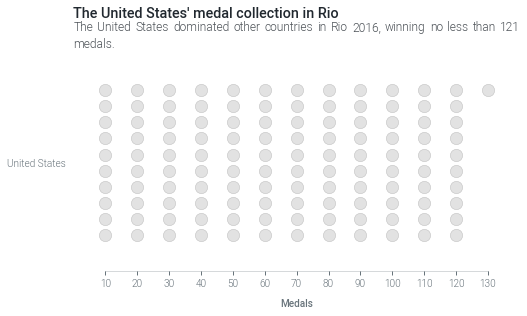

In [4]:
# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(8, 4)))
viz.draw_population(df.iloc[0].Total, 10, df.index[0], height=0.8, **style)

# finalize the plot
viz.set_xlabel('Medals')
viz.set_title('The United States\' medal collection in Rio', loc='left')
viz.set_caption("""The United States dominated other countries in Rio 2016, winning no less than 121 medals.""", align='justify')
viz.show()

You can repeat the same process several times, and Multiplex automatically draws the populations one after the other.
All you have to do is call the same function with the population sizes of each country.
In our example, this is a great way of showing how the USA dominated other countries in the medal table.

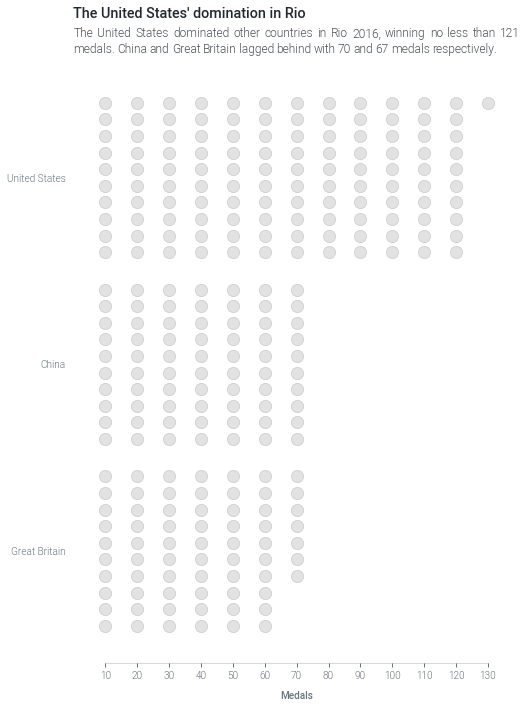

In [5]:
# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(8, 11)))
for country in df.index[:3]:
    viz.draw_population(df.loc[country].Total, 10, country, height=0.8, **style)

# finalize the plot
viz.set_xlabel('Medals')
viz.set_title('The United States\' domination in Rio', loc='left')
viz.set_caption("""The United States dominated other countries in Rio 2016, winning no less than 121 medals.
                   China and Great Britain lagged behind with 70 and 67 medals respectively.""", align='justify')
viz.show()

Population charts can be more powerful than that.
You can style each individual item to highlight what a population is made up of.
In the next example, we highlight how many gold medals each country won.

To highlight gold medals, it's not enough to provide the population size.
Instead, we provide a list of items, which can be dictionaries, or any other type of value:

Multiplex interprets dictionaries as styling options.
Therefore we specify a specific style for gold medals.
The style values we specify in this dictionary override the general style we defined earlier.

Any other value (we use the boolean `True` to represent all silver and bronze medals) are interpreted as normal items and drawn using the general style.

In addition to the gold medal's styling options, we set a `label` key.
Multiplex automatically picks up this label and adds the item to the legend.

> You can style the legend's labels, as in other visualizations.
  To do that, pass on a `label_style` dictionary as a parameter to the `draw_population` method call.

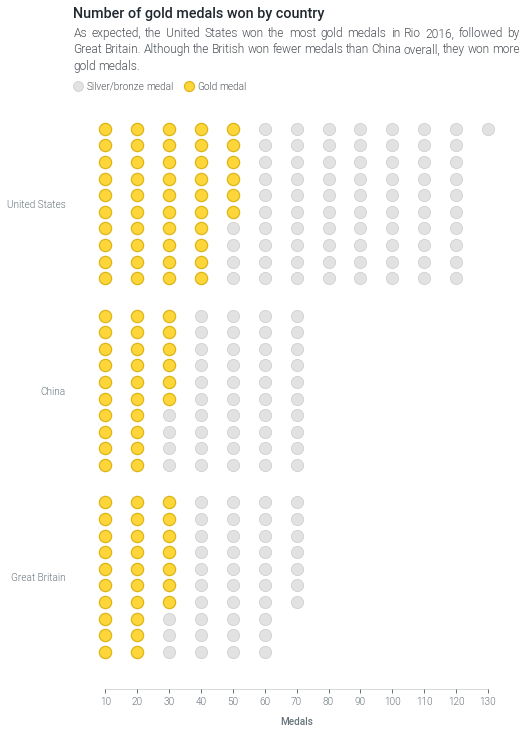

In [6]:
# create a specific style for gold medals
gold = { 'color': '#FFD639', 'edgecolors': '#DCB518', 'linewidths': 1.25 }
gold['label'] = 'Gold medal'

# draw the visualization
viz = drawable.Drawable(plt.figure(figsize=(8, 11)))
for country in df.index[:3]:
    medals = [ gold ] * df.loc[country].Gold
    medals.extend([ True ] * df.loc[country].Silver)
    medals.extend([ True ] * df.loc[country].Bronze)
    viz.draw_population(medals, 10, country, height=0.8, label='Silver/bronze medal', **style)

# finalize the plot
viz.set_xlabel('Medals')
viz.set_title('Number of gold medals won by country', loc='left')
viz.set_caption("""As expected, the United States won the most gold medals in Rio 2016, followed by Great Britain.
                   Although the British won fewer medals than China overall, they won more gold medals.""", align='justify')
viz.savefig('exports/7-population.png', dpi=300, bbox_inches='tight')

Population charts can be powerful tools.
We could break down the populations further into the gold, silver and bronze medals.

If you're interested in learning more about population charts, including functionality that was not covered in this tutorial, on [Multiplex's documentation site](https://nicholasmamo.github.io/multiplex-plot/population.html).